In [1]:
import os, sys
import h5py
import numpy as np
import pandas as pd
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy import optimize
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.optimize import curve_fit
from scipy.stats import norm
import matplotlib.font_manager as font_manager
from tqdm.autonotebook import tqdm
from matplotlib.backends.backend_pdf import PdfPages
import time
from scipy.optimize import curve_fit
from scipy.stats import norm
from scipy import stats
import scipy.stats

import etroc0_benchtest

C:\Users\qsun\AppData\Local\Continuum\anaconda3\lib\site-packages\tqdm\autonotebook.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)



npoints is 2000
events_t is 1000


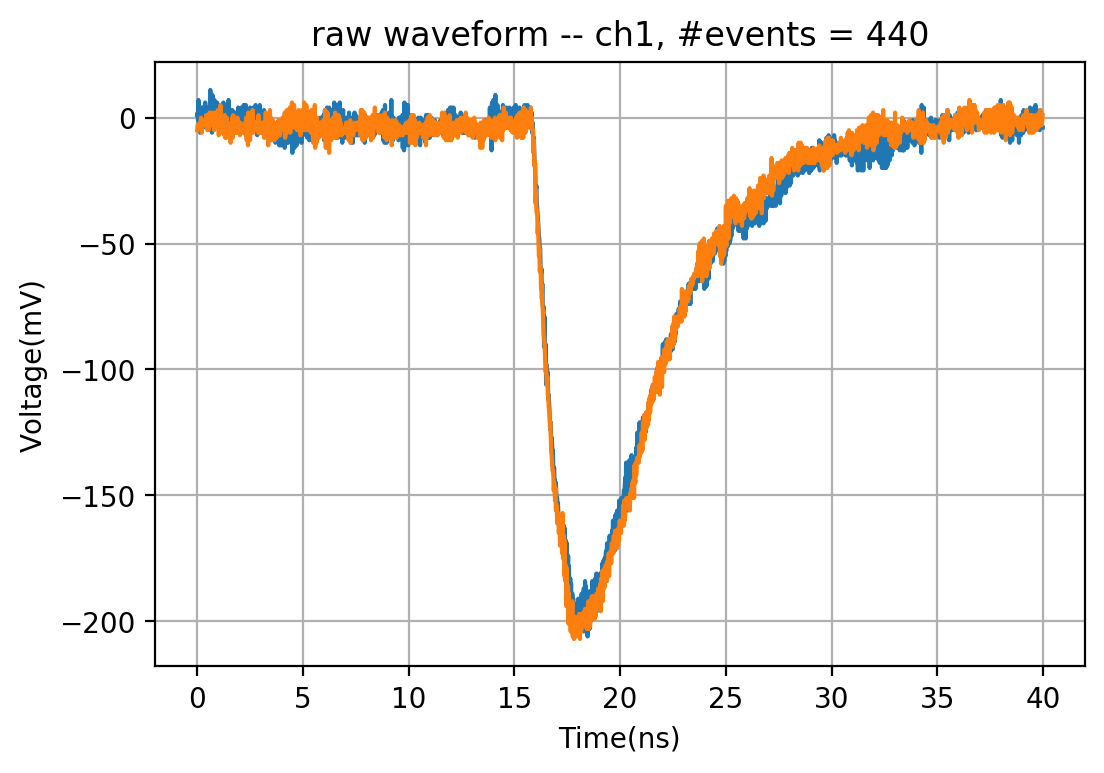

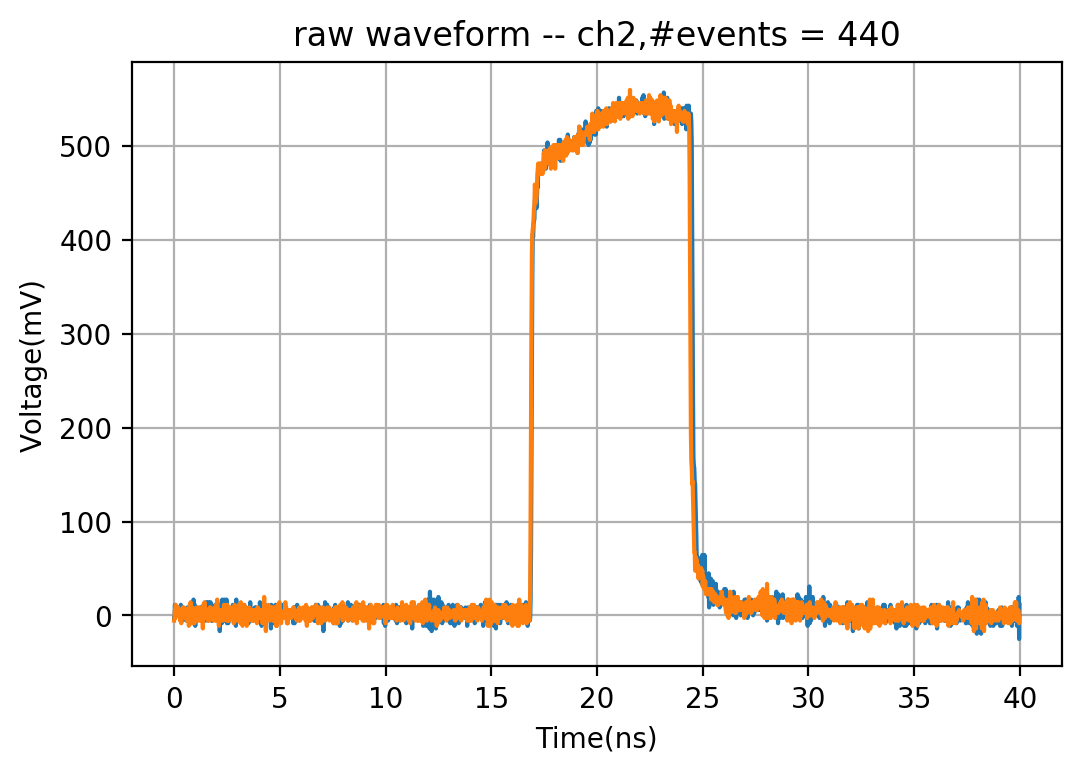

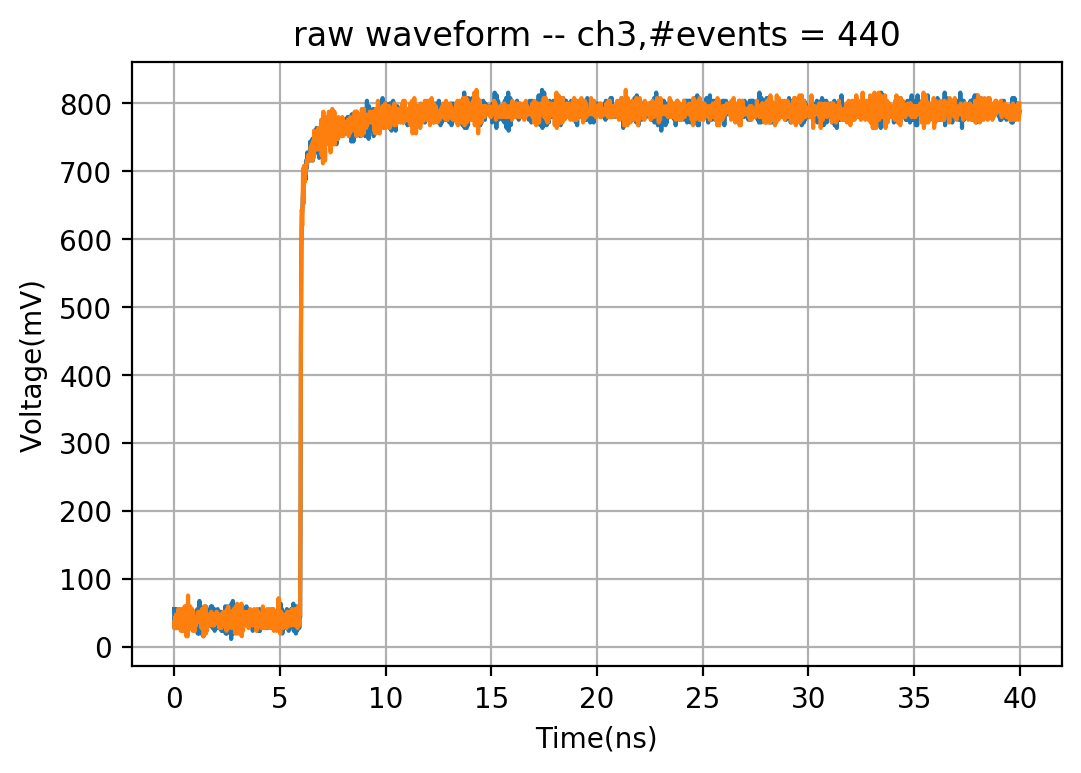

In [2]:
########## ETROC0 batch1 board1 ######################
textstr = '\n'.join((
    '-- ETROC0 batch1 board1',
    '-- baseline = DAC207',
    '-- low power, default gain'))
path ="../../../CMS ETL ASIC/ETROC0/test results/FNAL_Test/202006_ETROC0/"
file_in = 'Discriminator_HGDP/8fC/HGDP_DAC232_8fC_0.hdf5'
# file_in = 'DGDP/30fC/DGDP_DAC216_30fC_0.hdf5'
# file_in = 'DGDP/4fC/DGDP_DAC228_4fC_0.hdf5'


tdc_bin = 10e-3


################## check waveform  #######################

file = path + file_in

data, attrs = etroc0_benchtest.extract_dataset(file)
events_t = attrs['readout_size']
npoints = attrs['nPt']
x = np.arange(npoints)
dt = attrs['dt']

filelist = []
filelist_to_use = [file_in]
for apath in filelist_to_use:
    if apath.find(".hdf5") > -1:
        filelist.append(os.path.join(path,apath))
y_ch1 = []
y_ch2 = []
y_ch3 = []
y_ch4 = []
for item in tqdm(filelist):
    data, attrs = etroc0_benchtest.extract_dataset(item)
    for event in range(len(data[0])):
        y_ch1.append(data[0][event])
    for event in range(len(data[1])):
        y_ch2.append(data[1][event])
    for event in range(len(data[2])):
        y_ch3.append(data[2][event])
    for event in range(len(data[3])):
        y_ch4.append(data[3][event])

events_ch1 = len(y_ch1)
events_ch2 = len(y_ch2)
events_ch3 = len(y_ch3)
events_ch4 = len(y_ch4)
events_t = events_ch1
time = x*dt*1e9




# plt.plot(y_ch1[2109])
print('npoints is',npoints)
print('events_t is',events_t)

# events_t = events_t - 2500
# events_t = events_t - 590
events_t = 440
plot_start = 438

######### Plot signal with points ch1  ###########
fig, ax1 = plt.subplots(dpi=200)
for ab in range(plot_start,events_t):
    ax1.plot(time, y_ch1[ab]*1000)
# ax1.set_xlim(left=15,right=25)
ax1.grid()
ax1.set(xlabel='Time(ns)', ylabel='Voltage(mV)',
       title='raw waveform -- ch1, #events = %d'%(events_t))
# pp.savefig(fig)
plt.show()


######### Plot signal with points ch2  ###########
fig, ax2 = plt.subplots(dpi=200)
for ab in range(plot_start,events_t):
    ax2.plot(time, y_ch2[ab]*1000)
# ax2.set_xlim(left=24,right=25.5)
ax2.grid()
ax2.set(xlabel='Time(ns)', ylabel='Voltage(mV)',
       title='raw waveform -- ch2,#events = %d'%(events_t))
# pp.savefig(fig)
plt.show()

######### Plot signal with points ch3  ###########
fig, ax3 = plt.subplots(dpi=200)
for ab in range(plot_start,events_t):
    ax3.plot(time, y_ch3[ab]*1000)
# ax3.set_xlim(left=9.75,right=10.25)
ax3.grid()
ax3.set(xlabel='Time(ns)', ylabel='Voltage(mV)',
       title='raw waveform -- ch3,#events = %d'%(events_t))
# pp.savefig(fig)
plt.show()

# ######### Plot signal with points ch4  ###########
# fig, ax4 = plt.subplots(dpi=200)
# for ab in range(0,events_t):
#     ax4.plot(time, y_ch4[ab]*1000)
# # ax2.set_xlim(left=60,right=80)
# ax4.grid()
# ax4.set(xlabel='Time(ns)', ylabel='Voltage(mV)',
#        title='raw waveform -- ch4,#events = %d'%(events_t))
# # pp.savefig(fig)
# plt.show()

# plt.close(fig)



In [3]:
########################################## DAC 216 #################################
filelist = [
    'Discriminator_HGDP/3fC/HGDP_DAC216_3fC_0.hdf5',
    'Discriminator_HGDP/4fC/HGDP_DAC216_4fC_0.hdf5',
    'Discriminator_HGDP/5fC/HGDP_DAC216_5fC_0.hdf5',
    'Discriminator_HGDP/6fC/HGDP_DAC216_6fC_0.hdf5',
    'Discriminator_HGDP/8fC/HGDP_DAC216_8fC_0.hdf5',
    'Discriminator_HGDP/10fC/HGDP_DAC216_10fC_0.hdf5',
    'Discriminator_HGDP/12fC/HGDP_DAC216_12fC_0.hdf5',
    'Discriminator_HGDP/15fC/HGDP_DAC216_15fC_0.hdf5',
    'Discriminator_HGDP/20fC/HGDP_DAC216_20fC_0.hdf5',
    'Discriminator_HGDP/30fC/HGDP_DAC216_30fC_0.hdf5'
]

charge_DAC216_list = [3, 4, 5, 6, 8, 10, 12, 15, 20, 30]



file_num = len(filelist)

print('file_num is', file_num)


t_trigger_DAC216_list = []
mean_t_trigger_DAC216_list = []
std_t_trigger_DAC216_list = []
t_pa_DAC216_list = []
mean_t_pa_DAC216_list = []
std_t_pa_DAC216_list = []
t_discri_le_DAC216_list = []
mean_t_discri_le_DAC216_list = []
std_t_discri_le_DAC216_list = []
t_discri_te_DAC216_list = []
mean_t_discri_te_DAC216_list = []
std_t_discri_te_DAC216_list = []
t_discri_le_notrig_DAC216_list = []
mean_t_discri_le_notrig_DAC216_list = []
std_t_discri_le_notrig_DAC216_list = []
t_discri_te_notrig_DAC216_list = []
mean_t_discri_te_notrig_DAC216_list = []
std_t_discri_te_notrig_DAC216_list = []
ampl_ch1_DAC216_list = []
mean_ampl_DAC216_list = []
std_ampl_DAC216_list = []
q_ch1_DAC216_list = []
mean_q_DAC216_list = []
std_q_DAC216_list = []

for item in tqdm(filelist):
    file_in = item
    charge_size = item.split('_')[2]
    DAC = item.split('_')[1]
    (t_trigger, mean_t_trigger, std_t_trigger, 
    t_pa, mean_t_pa, std_t_pa, 
    t_discri_le, mean_t_discri_le, std_t_discri_le, 
    t_discri_te, mean_t_discri_te, std_t_discri_te, 
    t_discri_le_notrig, mean_t_discri_le_notrig, std_t_discri_le_notrig, 
    t_discri_te_notrig, mean_t_discri_te_notrig, std_t_discri_te_notrig,
    ampl_ch1, mean_ampl, std_ampl,
    q_ch1, mean_q, std_q) = etroc0_benchtest.analyze_single_charge(
        hdf5_in=file_in, path=path, charge_size=charge_size, DAC=DAC, tdc_bin=tdc_bin, transCond = 4.4e3, 
        tdc_start_trigger=0, tdc_start_pa=0, tdc_le_start=5, tdc_te_start=38)
    
    t_trigger_DAC216_list.append(t_trigger)
    mean_t_trigger_DAC216_list.append(mean_t_trigger)
    std_t_trigger_DAC216_list.append(std_t_trigger*1000)
    t_pa_DAC216_list.append(t_pa)
    mean_t_pa_DAC216_list.append(mean_t_pa)
    std_t_pa_DAC216_list.append(std_t_pa*1000)
    t_discri_le_DAC216_list.append(t_discri_le)
    mean_t_discri_le_DAC216_list.append(mean_t_discri_le)
    std_t_discri_le_DAC216_list.append(std_t_discri_le*1000)
    t_discri_te_DAC216_list.append(t_discri_te)
    mean_t_discri_te_DAC216_list.append(mean_t_discri_te)
    std_t_discri_te_DAC216_list.append(std_t_discri_te*1000)
    t_discri_le_notrig_DAC216_list.append(t_discri_le_notrig)
    mean_t_discri_le_notrig_DAC216_list.append(mean_t_discri_le_notrig)
    std_t_discri_le_notrig_DAC216_list.append(std_t_discri_le_notrig*1000)
    t_discri_te_notrig_DAC216_list.append(t_discri_te_notrig)
    mean_t_discri_te_notrig_DAC216_list.append(mean_t_discri_te_notrig)
    std_t_discri_te_notrig_DAC216_list.append(std_t_discri_te_notrig*1000)
    ampl_ch1_DAC216_list.append(ampl_ch1)
    mean_ampl_DAC216_list.append(mean_ampl)
    std_ampl_DAC216_list.append(std_ampl)
    q_ch1_DAC216_list.append(q_ch1)
    mean_q_DAC216_list.append(mean_q)
    std_q_DAC216_list.append(std_q)

print('*****************************************************************************************')
print('*****************************************************************************************')
print('*****************************************************************************************')
print('std_t_pa_DAC216_list is\n',std_t_pa_DAC216_list)
print('*****************************************************************************************')
print('std_t_discri_le_notrig_DAC216_list is\n',std_t_discri_le_notrig_DAC216_list)
print('*****************************************************************************************')
print('std_t_discri_te_notrig_DAC216_list is\n', std_t_discri_te_notrig_DAC216_list)
print('*****************************************************************************************')
print('mean_ampl_DAC216_list is\n', mean_ampl_DAC216_list)
print('*****************************************************************************************')
print('mean_q_DAC216_list is\n', mean_q_DAC216_list)

file_num is 10



npoints at DAC216 / HGDP/3fC/HGDP is 2000
events_t is 1000
threshold of trigger is 0.15360000000000001
trigger crossing searching is done
trigger mean is 4.795540000000001 ns
trigger std is 0.005736584349593376 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 15.178270000000008 ns
PA std is 0.04732554384262272 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 15.867550000000008 ns
discriminator leading std is 0.05243374390600027 ns
discriminator trailing mean is 22.976330000000118 ns
discriminator trailing std is 0.3214399338912329 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 11.072010000000008 ns
discriminator t_le std (trigger removed) is 0.052316917913807014 ns
discriminator t

C:\Users\qsun\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\qsun\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



npoints at DAC216 / HGDP/4fC/HGDP is 2000
events_t is 1000
threshold of trigger is 0.199
trigger crossing searching is done
trigger mean is 5.994970000000002 ns
trigger std is 0.005253484557890964 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 16.23284000000001 ns
PA std is 0.039730773966787654 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 16.876540000000013 ns
discriminator leading std is 0.03868886661560426 ns
discriminator trailing mean is 25.46713000000012 ns
discriminator trailing std is 0.363463427458665 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.88157000000001 ns
discriminator t_le std (trigger removed) is 0.03848421884357298 ns
discriminator t_te mean (trigger 


npoints at DAC216 / HGDP/5fC/HGDP is 2000
events_t is 1000
threshold of trigger is 0.25079999999999997
trigger crossing searching is done
trigger mean is 5.995260000000002 ns
trigger std is 0.0049932354240511175 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 16.12646000000001 ns
PA std is 0.03206974274920207 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 16.766890000000014 ns
discriminator leading std is 0.03116452951674332 ns
discriminator trailing mean is 26.401760000000117 ns
discriminator trailing std is 0.34315638184361397 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.77163000000001 ns
discriminator t_le std (trigger removed) is 0.030588283704712282 ns
discriminator t


npoints at DAC216 / HGDP/6fC/HGDP is 2000
events_t is 1000
threshold of trigger is 0.30560000000000004
trigger crossing searching is done
trigger mean is 5.995700000000003 ns
trigger std is 0.005320714237769143 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 16.064200000000014 ns
PA std is 0.023292917378464534 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 16.69152000000001 ns
discriminator leading std is 0.02837762498871324 ns
discriminator trailing mean is 27.106970000000118 ns
discriminator trailing std is 0.34246301858740924 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.69582000000001 ns
discriminator t_le std (trigger removed) is 0.027815959447771 ns
discriminator t_te


npoints at DAC216 / HGDP/8fC/HGDP is 2000
events_t is 1000
threshold of trigger is 0.406
trigger crossing searching is done
trigger mean is 5.9953600000000025 ns
trigger std is 0.005335766111815552 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 16.019690000000015 ns
PA std is 0.019457746529339393 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 16.60409000000001 ns
discriminator leading std is 0.022360051431067354 ns
discriminator trailing mean is 28.107030000000123 ns
discriminator trailing std is 0.32967662807666576 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.60873000000001 ns
discriminator t_le std (trigger removed) is 0.021874347990282553 ns
discriminator t_te mean (tr


npoints at DAC216 / HGDP/10fC/HGDP is 2000
events_t is 1000
threshold of trigger is 0.5025000000000001
trigger crossing searching is done
trigger mean is 7.9951900000000045 ns
trigger std is 0.005075815205461967 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 17.981920000000013 ns
PA std is 0.017666737106777252 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 18.542210000000015 ns
discriminator leading std is 0.019875006918237403 ns
discriminator trailing mean is 30.841190000000125 ns
discriminator trailing std is 0.32314963082138926 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.547020000000009 ns
discriminator t_le std (trigger removed) is 0.019455580176391183 ns
discriminat


npoints at DAC216 / HGDP/12fC/HGDP is 2000
events_t is 1000
threshold of trigger is 0.609
trigger crossing searching is done
trigger mean is 7.995440000000004 ns
trigger std is 0.005348495115450586 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 17.956470000000017 ns
PA std is 0.016032438990995716 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 18.50317000000001 ns
discriminator leading std is 0.018826871752895828 ns
discriminator trailing mean is 31.327810000000124 ns
discriminator trailing std is 0.3316358000879883 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.507730000000011 ns
discriminator t_le std (trigger removed) is 0.018114830940419713 ns
discriminator t_te mean (tr


npoints at DAC216 / HGDP/15fC/HGDP is 2000
events_t is 1000
threshold of trigger is 0.772
trigger crossing searching is done
trigger mean is 7.996350000000003 ns
trigger std is 0.005794609564068883 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 17.95123000000001 ns
PA std is 0.015562361645971428 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 18.459930000000014 ns
discriminator leading std is 0.016108851604010127 ns
discriminator trailing mean is 31.881720000000126 ns
discriminator trailing std is 0.35058243196144173 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.46358000000001 ns
discriminator t_le std (trigger removed) is 0.015342216267541555 ns
discriminator t_te mean (tr


npoints at DAC216 / HGDP/20fC/HGDP is 2000
events_t is 1000
threshold of trigger is 0.9249999999999999
trigger crossing searching is done
trigger mean is 9.992430000000004 ns
trigger std is 0.0068844099238785875 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 19.581280000000014 ns
PA std is 2.1689428672973405 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.416610000000016 ns
discriminator leading std is 0.015710120941609257 ns
discriminator trailing mean is 34.32175000000008 ns
discriminator trailing std is 0.3600500486043495 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.42418000000001 ns
discriminator t_le std (trigger removed) is 0.014890520474449217 ns
discriminator t_


npoints at DAC216 / HGDP/30fC/HGDP is 2000
events_t is 1000
threshold of trigger is 0.434
trigger crossing searching is done
trigger mean is 9.996160000000003 ns
trigger std is 0.0058697870489483 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 0.7328300000000001 ns
PA std is 0.943968373993536 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.664850000000012 ns
discriminator leading std is 0.01381222284789831 ns
discriminator trailing mean is 34.551570000000076 ns
discriminator trailing std is 0.4006387838190322 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.66869000000001 ns
discriminator t_le std (trigger removed) is 0.013007071153799543 ns
discriminator t_te mean (trigger 

In [4]:
########################################## DAC 222 #################################
filelist = [
    'Discriminator_HGDP/3fC/HGDP_DAC222_3fC_0.hdf5',
    'Discriminator_HGDP/4fC/HGDP_DAC222_4fC_0.hdf5',
    'Discriminator_HGDP/5fC/HGDP_DAC222_5fC_0.hdf5',
    'Discriminator_HGDP/6fC/HGDP_DAC222_6fC_0.hdf5',
    'Discriminator_HGDP/8fC/HGDP_DAC222_8fC_0.hdf5',
    'Discriminator_HGDP/10fC/HGDP_DAC222_10fC_0.hdf5',
    'Discriminator_HGDP/12fC/HGDP_DAC222_12fC_0.hdf5',
    'Discriminator_HGDP/15fC/HGDP_DAC222_15fC_0.hdf5',
    'Discriminator_HGDP/20fC/HGDP_DAC222_20fC_0.hdf5',
    'Discriminator_HGDP/30fC/HGDP_DAC222_30fC_0.hdf5'
]

charge_DAC222_list = [3, 4, 5, 6, 8, 10, 12, 15, 20, 30]


file_num = len(filelist)

print('file_num is', file_num)


t_trigger_DAC222_list = []
mean_t_trigger_DAC222_list = []
std_t_trigger_DAC222_list = []
t_pa_DAC222_list = []
mean_t_pa_DAC222_list = []
std_t_pa_DAC222_list = []
t_discri_le_DAC222_list = []
mean_t_discri_le_DAC222_list = []
std_t_discri_le_DAC222_list = []
t_discri_te_DAC222_list = []
mean_t_discri_te_DAC222_list = []
std_t_discri_te_DAC222_list = []
t_discri_le_notrig_DAC222_list = []
mean_t_discri_le_notrig_DAC222_list = []
std_t_discri_le_notrig_DAC222_list = []
t_discri_te_notrig_DAC222_list = []
mean_t_discri_te_notrig_DAC222_list = []
std_t_discri_te_notrig_DAC222_list = []
ampl_ch1_DAC222_list = []
mean_ampl_DAC222_list = []
std_ampl_DAC222_list = []
q_ch1_DAC222_list = []
mean_q_DAC222_list = []
std_q_DAC222_list = []

for item in tqdm(filelist):
    file_in = item
    charge_size = item.split('_')[2]
    DAC = item.split('_')[1]
    (t_trigger, mean_t_trigger, std_t_trigger, 
    t_pa, mean_t_pa, std_t_pa, 
    t_discri_le, mean_t_discri_le, std_t_discri_le, 
    t_discri_te, mean_t_discri_te, std_t_discri_te, 
    t_discri_le_notrig, mean_t_discri_le_notrig, std_t_discri_le_notrig, 
    t_discri_te_notrig, mean_t_discri_te_notrig, std_t_discri_te_notrig,
    ampl_ch1, mean_ampl, std_ampl,
    q_ch1, mean_q, std_q) = etroc0_benchtest.analyze_single_charge(
        hdf5_in=file_in, path=path, charge_size=charge_size, DAC=DAC, tdc_bin=tdc_bin, transCond = 4.4e3, 
        tdc_start_trigger=0, tdc_start_pa=0, tdc_le_start=5, tdc_te_start=38)
    
    t_trigger_DAC222_list.append(t_trigger)
    mean_t_trigger_DAC222_list.append(mean_t_trigger)
    std_t_trigger_DAC222_list.append(std_t_trigger*1000)
    t_pa_DAC222_list.append(t_pa)
    mean_t_pa_DAC222_list.append(mean_t_pa)
    std_t_pa_DAC222_list.append(std_t_pa*1000)
    t_discri_le_DAC222_list.append(t_discri_le)
    mean_t_discri_le_DAC222_list.append(mean_t_discri_le)
    std_t_discri_le_DAC222_list.append(std_t_discri_le*1000)
    t_discri_te_DAC222_list.append(t_discri_te)
    mean_t_discri_te_DAC222_list.append(mean_t_discri_te)
    std_t_discri_te_DAC222_list.append(std_t_discri_te*1000)
    t_discri_le_notrig_DAC222_list.append(t_discri_le_notrig)
    mean_t_discri_le_notrig_DAC222_list.append(mean_t_discri_le_notrig)
    std_t_discri_le_notrig_DAC222_list.append(std_t_discri_le_notrig*1000)
    t_discri_te_notrig_DAC222_list.append(t_discri_te_notrig)
    mean_t_discri_te_notrig_DAC222_list.append(mean_t_discri_te_notrig)
    std_t_discri_te_notrig_DAC222_list.append(std_t_discri_te_notrig*1000)
    ampl_ch1_DAC222_list.append(ampl_ch1)
    mean_ampl_DAC222_list.append(mean_ampl)
    std_ampl_DAC222_list.append(std_ampl)
    q_ch1_DAC222_list.append(q_ch1)
    mean_q_DAC222_list.append(mean_q)
    std_q_DAC222_list.append(std_q)

print('*****************************************************************************************')
print('*****************************************************************************************')
print('*****************************************************************************************')
print('std_t_pa_DAC222_list is\n',std_t_pa_DAC222_list)
print('*****************************************************************************************')
print('std_t_discri_le_notrig_DAC222_list is\n',std_t_discri_le_notrig_DAC222_list)
print('*****************************************************************************************')
print('std_t_discri_te_notrig_DAC222_list is\n', std_t_discri_te_notrig_DAC222_list)
print('*****************************************************************************************')
print('mean_ampl_DAC222_list is\n', mean_ampl_DAC222_list)
print('*****************************************************************************************')
print('mean_q_DAC222_list is\n', mean_q_DAC222_list)

file_num is 10



npoints at DAC222 / HGDP/3fC/HGDP is 2000
events_t is 1000
threshold of trigger is 0.15280000000000002
trigger crossing searching is done
trigger mean is 4.796 ns
trigger std is 0.00542217668469033 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 15.175360000000008 ns
PA std is 0.048106864375055756 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 16.115840000000013 ns
discriminator leading std is 0.06280839434343098 ns
discriminator trailing mean is 21.693540000000116 ns
discriminator trailing std is 0.2614392250600513 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 11.31984000000001 ns
discriminator t_le std (trigger removed) is 0.06254098176395964 ns
discriminator t_te mean (trig


npoints at DAC222 / HGDP/4fC/HGDP is 2000
events_t is 1000
threshold of trigger is 0.201
trigger crossing searching is done
trigger mean is 5.995070000000002 ns
trigger std is 0.004999509975987539 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 16.23573000000001 ns
PA std is 0.03941404698835133 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 17.04714000000001 ns
discriminator leading std is 0.039578029258668164 ns
discriminator trailing mean is 24.061530000000122 ns
discriminator trailing std is 0.2324262444303571 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 11.052070000000011 ns
discriminator t_le std (trigger removed) is 0.0393499059719333 ns
discriminator t_te mean (trigger


npoints at DAC222 / HGDP/5fC/HGDP is 2000
events_t is 1000
threshold of trigger is 0.2496
trigger crossing searching is done
trigger mean is 5.994570000000001 ns
trigger std is 0.005367969821077496 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 16.125530000000012 ns
PA std is 0.034104531956911585 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 16.89659000000001 ns
discriminator leading std is 0.031033399749302082 ns
discriminator trailing mean is 24.97795000000012 ns
discriminator trailing std is 0.2583425971457284 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.902020000000011 ns
discriminator t_le std (trigger removed) is 0.03061240924853812 ns
discriminator t_te mean (trig


npoints at DAC222 / HGDP/6fC/HGDP is 2000
events_t is 1000
threshold of trigger is 0.3056
trigger crossing searching is done
trigger mean is 5.995660000000002 ns
trigger std is 0.0054188928758556725 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 16.06576000000001 ns
PA std is 0.0236943537578043 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 16.80488000000001 ns
discriminator leading std is 0.026313221011499067 ns
discriminator trailing mean is 25.736430000000116 ns
discriminator trailing std is 0.26753122266382307 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.809220000000009 ns
discriminator t_le std (trigger removed) is 0.025988297366314642 ns
discriminator t_te mean (tri


npoints at DAC222 / HGDP/8fC/HGDP is 2000
events_t is 1000
threshold of trigger is 0.404
trigger crossing searching is done
trigger mean is 5.995190000000003 ns
trigger std is 0.0049963886958481266 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 16.01700000000001 ns
PA std is 0.01814386948806728 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 16.691500000000016 ns
discriminator leading std is 0.020955906088738752 ns
discriminator trailing mean is 26.81590000000012 ns
discriminator trailing std is 0.23123362644736614 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.69631000000001 ns
discriminator t_le std (trigger removed) is 0.02029492301044859 ns
discriminator t_te mean (trigg


npoints at DAC222 / HGDP/10fC/HGDP is 2000
events_t is 1000
threshold of trigger is 0.51
trigger crossing searching is done
trigger mean is 7.995600000000004 ns
trigger std is 0.005295280917949377 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 17.98215000000001 ns
PA std is 0.017368865823650704 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 18.620130000000014 ns
discriminator leading std is 0.018646262360055496 ns
discriminator trailing mean is 29.53399000000012 ns
discriminator trailing std is 0.2305844311743534 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.624530000000009 ns
discriminator t_le std (trigger removed) is 0.018060429120040876 ns
discriminator t_te mean (trig


npoints at DAC222 / HGDP/12fC/HGDP is 2000
events_t is 1000
threshold of trigger is 0.609
trigger crossing searching is done
trigger mean is 7.9954000000000045 ns
trigger std is 0.005276362383309054 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 17.957620000000016 ns
PA std is 0.01537971391151333 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 18.570810000000012 ns
discriminator leading std is 0.016396459983788986 ns
discriminator trailing mean is 30.04749000000012 ns
discriminator trailing std is 0.23793822706744722 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.575410000000009 ns
discriminator t_le std (trigger removed) is 0.015634318021582962 ns
discriminator t_te mean (t


npoints at DAC222 / HGDP/15fC/HGDP is 2000
events_t is 1000
threshold of trigger is 0.756
trigger crossing searching is done
trigger mean is 7.995280000000005 ns
trigger std is 0.005321804205342282 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 17.950690000000012 ns
PA std is 0.015589223842128928 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 18.522020000000012 ns
discriminator leading std is 0.015103628703063064 ns
discriminator trailing mean is 30.553730000000126 ns
discriminator trailing std is 0.2328359660791264 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.52674000000001 ns
discriminator t_le std (trigger removed) is 0.0141270095915587 ns
discriminator t_te mean (trig


npoints at DAC222 / HGDP/20fC/HGDP is 2000
events_t is 1000
threshold of trigger is 0.9199999999999999
trigger crossing searching is done
trigger mean is 9.992300000000004 ns
trigger std is 0.006716397844082651 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 19.529250000000015 ns
PA std is 2.324729949370466 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.468490000000013 ns
discriminator leading std is 0.012931353370780356 ns
discriminator trailing mean is 33.0081600000001 ns
discriminator trailing std is 0.24832763519189188 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.47619000000001 ns
discriminator t_le std (trigger removed) is 0.012082379732486192 ns
discriminator t_te


npoints at DAC222 / HGDP/30fC/HGDP is 2000
events_t is 1000
threshold of trigger is 0.434
trigger crossing searching is done
trigger mean is 9.996030000000003 ns
trigger std is 0.0056337465331696085 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 0.80841 ns
PA std is 1.0489095155922652 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.70934000000002 ns
discriminator leading std is 0.012213287845621154 ns
discriminator trailing mean is 33.1773000000001 ns
discriminator trailing std is 0.24147113699156156 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.71331000000001 ns
discriminator t_le std (trigger removed) is 0.010767724922192195 ns
discriminator t_te mean (trigger removed)

In [5]:
########################################## DAC 232 #################################
filelist = [
#     'Discriminator_HGDP/3fC/HGDP_DAC232_3fC_0.hdf5',
    'Discriminator_HGDP/4fC/HGDP_DAC232_4fC_0.hdf5',
    'Discriminator_HGDP/5fC/HGDP_DAC232_5fC_0.hdf5',
    'Discriminator_HGDP/6fC/HGDP_DAC232_6fC_0.hdf5',
    'Discriminator_HGDP/8fC/HGDP_DAC232_8fC_0.hdf5',
    'Discriminator_HGDP/10fC/HGDP_DAC232_10fC_0.hdf5',
    'Discriminator_HGDP/12fC/HGDP_DAC232_12fC_0.hdf5',
    'Discriminator_HGDP/15fC/HGDP_DAC232_15fC_0.hdf5',
    'Discriminator_HGDP/20fC/HGDP_DAC232_20fC_0.hdf5',
    'Discriminator_HGDP/30fC/HGDP_DAC232_30fC_0.hdf5'
]

charge_DAC232_list = [4, 5, 6, 8, 10, 12, 15, 20, 30]



file_num = len(filelist)

print('file_num is', file_num)


t_trigger_DAC232_list = []
mean_t_trigger_DAC232_list = []
std_t_trigger_DAC232_list = []
t_pa_DAC232_list = []
mean_t_pa_DAC232_list = []
std_t_pa_DAC232_list = []
t_discri_le_DAC232_list = []
mean_t_discri_le_DAC232_list = []
std_t_discri_le_DAC232_list = []
t_discri_te_DAC232_list = []
mean_t_discri_te_DAC232_list = []
std_t_discri_te_DAC232_list = []
t_discri_le_notrig_DAC232_list = []
mean_t_discri_le_notrig_DAC232_list = []
std_t_discri_le_notrig_DAC232_list = []
t_discri_te_notrig_DAC232_list = []
mean_t_discri_te_notrig_DAC232_list = []
std_t_discri_te_notrig_DAC232_list = []
ampl_ch1_DAC232_list = []
mean_ampl_DAC232_list = []
std_ampl_DAC232_list = []
q_ch1_DAC232_list = []
mean_q_DAC232_list = []
std_q_DAC232_list = []

for item in tqdm(filelist):
    file_in = item
    charge_size = item.split('_')[2]
    DAC = item.split('_')[1]
    (t_trigger, mean_t_trigger, std_t_trigger, 
    t_pa, mean_t_pa, std_t_pa, 
    t_discri_le, mean_t_discri_le, std_t_discri_le, 
    t_discri_te, mean_t_discri_te, std_t_discri_te, 
    t_discri_le_notrig, mean_t_discri_le_notrig, std_t_discri_le_notrig, 
    t_discri_te_notrig, mean_t_discri_te_notrig, std_t_discri_te_notrig,
    ampl_ch1, mean_ampl, std_ampl,
    q_ch1, mean_q, std_q) = etroc0_benchtest.analyze_single_charge(
        hdf5_in=file_in, path=path, charge_size=charge_size, DAC=DAC, tdc_bin=tdc_bin, transCond = 4.4e3, 
        tdc_start_trigger=0, tdc_start_pa=0, tdc_le_start=5, tdc_te_start=38)
    
    t_trigger_DAC232_list.append(t_trigger)
    mean_t_trigger_DAC232_list.append(mean_t_trigger)
    std_t_trigger_DAC232_list.append(std_t_trigger*1000)
    t_pa_DAC232_list.append(t_pa)
    mean_t_pa_DAC232_list.append(mean_t_pa)
    std_t_pa_DAC232_list.append(std_t_pa*1000)
    t_discri_le_DAC232_list.append(t_discri_le)
    mean_t_discri_le_DAC232_list.append(mean_t_discri_le)
    std_t_discri_le_DAC232_list.append(std_t_discri_le*1000)
    t_discri_te_DAC232_list.append(t_discri_te)
    mean_t_discri_te_DAC232_list.append(mean_t_discri_te)
    std_t_discri_te_DAC232_list.append(std_t_discri_te*1000)
    t_discri_le_notrig_DAC232_list.append(t_discri_le_notrig)
    mean_t_discri_le_notrig_DAC232_list.append(mean_t_discri_le_notrig)
    std_t_discri_le_notrig_DAC232_list.append(std_t_discri_le_notrig*1000)
    t_discri_te_notrig_DAC232_list.append(t_discri_te_notrig)
    mean_t_discri_te_notrig_DAC232_list.append(mean_t_discri_te_notrig)
    std_t_discri_te_notrig_DAC232_list.append(std_t_discri_te_notrig*1000)
    ampl_ch1_DAC232_list.append(ampl_ch1)
    mean_ampl_DAC232_list.append(mean_ampl)
    std_ampl_DAC232_list.append(std_ampl)
    q_ch1_DAC232_list.append(q_ch1)
    mean_q_DAC232_list.append(mean_q)
    std_q_DAC232_list.append(std_q)

print('*****************************************************************************************')
print('*****************************************************************************************')
print('*****************************************************************************************')
print('std_t_pa_DAC232_list is\n',std_t_pa_DAC232_list)
print('*****************************************************************************************')
print('std_t_discri_le_notrig_DAC232_list is\n',std_t_discri_le_notrig_DAC232_list)
print('*****************************************************************************************')
print('std_t_discri_te_notrig_DAC232_list is\n', std_t_discri_te_notrig_DAC232_list)
print('*****************************************************************************************')
print('mean_ampl_DAC232_list is\n', mean_ampl_DAC232_list)
print('*****************************************************************************************')
print('mean_q_DAC232_list is\n', mean_q_DAC232_list)

file_num is 9



npoints at DAC232 / HGDP/4fC/HGDP is 2000
events_t is 1000
threshold of trigger is 0.2
trigger crossing searching is done
trigger mean is 4.794740000000001 ns
trigger std is 0.005303998491704047 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 15.038310000000008 ns
PA std is 0.039537879305799994 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 16.37865000000001 ns
discriminator leading std is 0.05967476434808959 ns
discriminator trailing mean is 20.571030000000114 ns
discriminator trailing std is 0.16420669627028014 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 11.58391000000001 ns
discriminator t_le std (trigger removed) is 0.059348225752755446 ns
discriminator t_te mean (trigge


npoints at DAC232 / HGDP/5fC/HGDP is 2000
events_t is 1000
threshold of trigger is 0.25079999999999997
trigger crossing searching is done
trigger mean is 5.9948700000000015 ns
trigger std is 0.0049983097142933175 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 16.12716000000001 ns
PA std is 0.03238108089610355 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 17.265250000000012 ns
discriminator leading std is 0.036899017602098516 ns
discriminator trailing mean is 22.750410000000116 ns
discriminator trailing std is 0.14917215524353078 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 11.270380000000008 ns
discriminator t_le std (trigger removed) is 0.03663953602326286 ns
discriminator


npoints at DAC232 / HGDP/6fC/HGDP is 2000
events_t is 1000
threshold of trigger is 0.304
trigger crossing searching is done
trigger mean is 5.995060000000001 ns
trigger std is 0.00499963998703896 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 16.06393000000001 ns
PA std is 0.02292716947204726 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 17.09058000000001 ns
discriminator leading std is 0.027361717782331815 ns
discriminator trailing mean is 23.476250000000118 ns
discriminator trailing std is 0.13782103431624665 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 11.09552000000001 ns
discriminator t_le std (trigger removed) is 0.02696904892650042 ns
discriminator t_te mean (trigger


npoints at DAC232 / HGDP/8fC/HGDP is 2000
events_t is 1000
threshold of trigger is 0.40800000000000003
trigger crossing searching is done
trigger mean is 5.995570000000002 ns
trigger std is 0.005241669581345165 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 16.01802000000001 ns
PA std is 0.018933557510410415 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 16.899260000000012 ns
discriminator leading std is 0.019335263122077853 ns
discriminator trailing mean is 24.54477000000012 ns
discriminator trailing std is 0.13720913635760573 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.90369000000001 ns
discriminator t_le std (trigger removed) is 0.018689138556926173 ns
discriminator t


npoints at DAC232 / HGDP/10fC/HGDP is 2000
events_t is 1000
threshold of trigger is 0.515
trigger crossing searching is done
trigger mean is 7.995530000000004 ns
trigger std is 0.005578449605401009 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 17.98130000000002 ns
PA std is 0.017666635220097263 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 18.786390000000015 ns
discriminator leading std is 0.016176152200075494 ns
discriminator trailing mean is 27.33939000000012 ns
discriminator trailing std is 0.14479201600917102 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.79086000000001 ns
discriminator t_le std (trigger removed) is 0.015667175878249624 ns
discriminator t_te mean (tri


npoints at DAC232 / HGDP/12fC/HGDP is 2000
events_t is 1000
threshold of trigger is 0.615
trigger crossing searching is done
trigger mean is 7.995390000000004 ns
trigger std is 0.0054815964827775055 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 17.95569000000002 ns
PA std is 0.016010118675387795 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 18.71470000000001 ns
discriminator leading std is 0.014453719244540178 ns
discriminator trailing mean is 27.91633000000012 ns
discriminator trailing std is 0.1403418365990699 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.719310000000009 ns
discriminator t_le std (trigger removed) is 0.013379981315382782 ns
discriminator t_te mean (tri


npoints at DAC232 / HGDP/15fC/HGDP is 2000
events_t is 1000
threshold of trigger is 0.748
trigger crossing searching is done
trigger mean is 7.994950000000005 ns
trigger std is 0.004999749993749581 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 17.951090000000015 ns
PA std is 0.015997246638093716 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 18.647160000000014 ns
discriminator leading std is 0.012654422151959098 ns
discriminator trailing mean is 28.48230000000012 ns
discriminator trailing std is 0.13455225750614527 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.65221000000001 ns
discriminator t_le std (trigger removed) is 0.011437477868830793 ns
discriminator t_te mean (tr


npoints at DAC232 / HGDP/20fC/HGDP is 2000
events_t is 1000
threshold of trigger is 0.9400000000000001
trigger crossing searching is done
trigger mean is 9.992570000000004 ns
trigger std is 0.006595081500633494 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 19.526550000000018 ns
PA std is 2.3271608018140926 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.573540000000015 ns
discriminator leading std is 0.011263587350395734 ns
discriminator trailing mean is 30.91595000000012 ns
discriminator trailing std is 0.1285538700312054 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.580970000000011 ns
discriminator t_le std (trigger removed) is 0.010146876366645824 ns
discriminator t_


npoints at DAC232 / HGDP/30fC/HGDP is 2000
events_t is 1000
threshold of trigger is 0.434
trigger crossing searching is done
trigger mean is 9.995970000000003 ns
trigger std is 0.005749704340224882 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 0.82927 ns
PA std is 1.0088183023220783 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.794690000000017 ns
discriminator leading std is 0.0097623716380804 ns
discriminator trailing mean is 31.158850000000122 ns
discriminator trailing std is 0.11926180235096238 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.79872000000001 ns
discriminator t_le std (trigger removed) is 0.008084652126096556 ns
discriminator t_te mean (trigger removed)

6.000000000000002
16.93000000000001
24.520000000000117
10.930000000000009
18.520000000000117


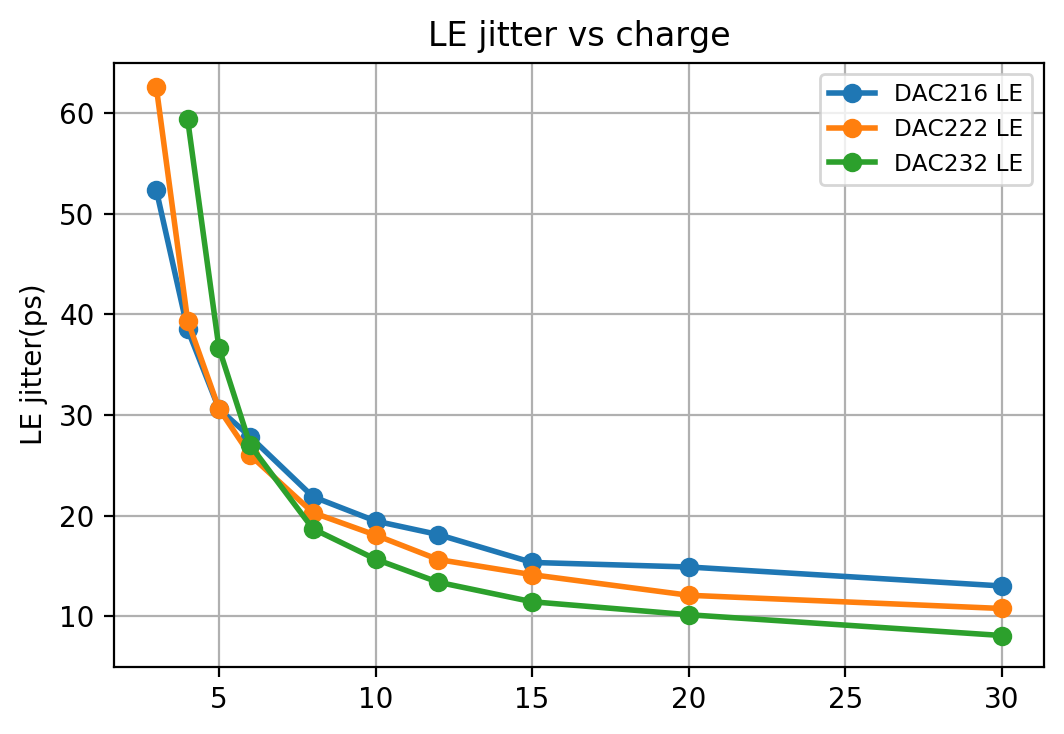

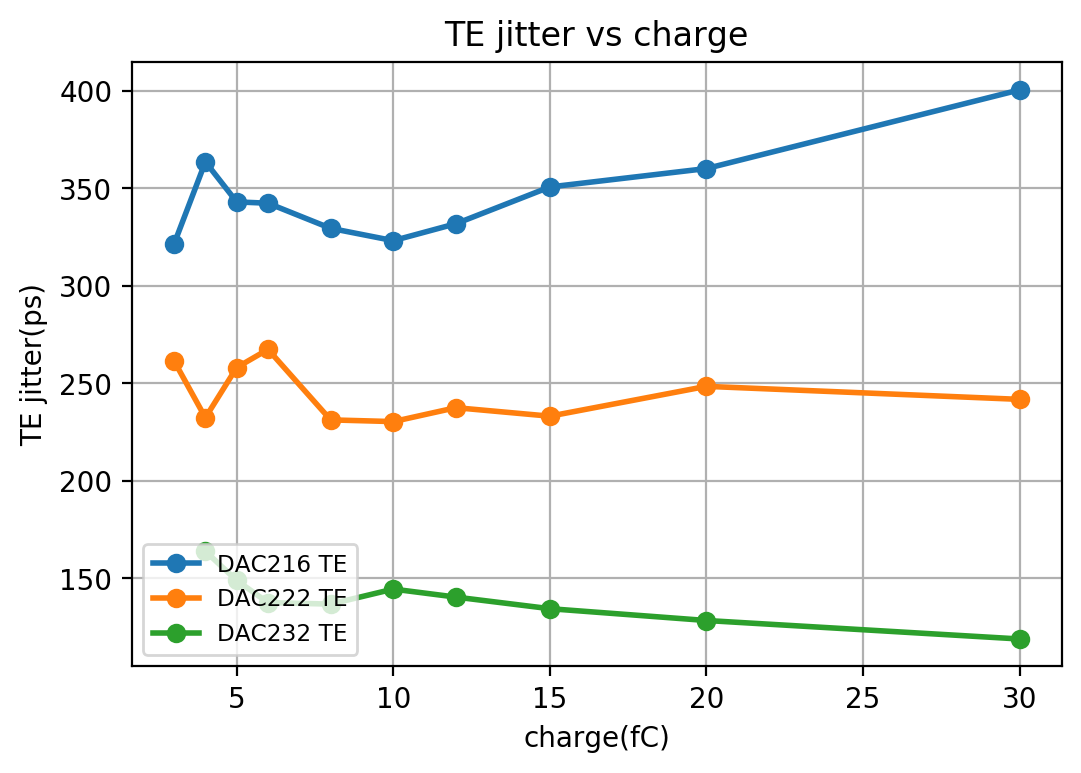

In [11]:
print(t_trigger_DAC232_list[3][438])
print(t_discri_le_DAC232_list[3][438])
print(t_discri_te_DAC232_list[3][438])
print(t_discri_le_notrig_DAC232_list[3][438])
print(t_discri_te_notrig_DAC232_list[3][438])
# ############## plot  ###############
# charge_DAC216_list = [3, 4, 5, 6, 8, 10, 12, 15, 20, 30]
# charge_DAC222_list = [4, 5, 6, 8, 10, 12, 15, 20, 30]
# charge_DAC228_list = [5, 6, 8, 10, 12, 15, 20, 30]
# std_t_discri_le_notrig_DAC216_list = [55.081312393576745, 33.5965400004161, 26.05374253345816, 
#                                       22.5273605866244, 18.81562582004275, 16.048937659543025, 
#                                       14.973709460247598, 12.898332256533537, 11.479982578381783, 11.415248573725846]
# std_t_discri_le_notrig_DAC222_list = [42.264784099759545, 28.33616770136146, 21.60300904966283, 
#                                       16.700071856129487, 13.96251768127515, 12.108030393087999, 
#                                       11.495519779459704, 9.761443284676796, 8.225442237349645]
# std_t_discri_le_notrig_DAC228_list = [39.770094292060314, 25.770479234964462, 17.58708617138944, 
#                                       12.937893955351925, 11.500642373361078, 9.781051835051402, 
#                                       8.127113571248723, 6.910352740633446]
# std_t_discri_te_notrig_DAC216_list = [136.65975623786466, 122.6894763212966, 103.3189768386996, 90.44033171100575, 
#                                       81.6119952886667, 77.18469391658961, 76.21657037677367, 74.75354439755857, 
#                                       86.70760851849761, 75.30381115851816]
# std_t_discri_te_notrig_DAC222_list = [93.108323473235, 92.4764801179013, 79.38929398853153, 69.01791361666994, 
#                                       62.30979838675822, 55.75950838196793, 53.888606402456176, 53.476577816824374, 
#                                       46.899221475405405]
# std_t_discri_te_notrig_DAC228_list = [72.6907146752451, 64.6289903990334, 57.5737361997525, 52.33364859245829, 
#                                       48.11770568095566, 41.1854947159715, 35.37269427113945, 32.352959292769185]

fig1,ax1 = plt.subplots(dpi=200)
ax1.plot(charge_DAC216_list, std_t_discri_le_notrig_DAC216_list, 'o-', linewidth=2,  label="DAC216 LE")
ax1.plot(charge_DAC222_list, std_t_discri_le_notrig_DAC222_list, 'o-', linewidth=2,  label="DAC222 LE")
ax1.plot(charge_DAC232_list, std_t_discri_le_notrig_DAC232_list, 'o-', linewidth=2,  label="DAC232 LE")

ax1.set(ylabel='LE jitter(ps)',
       title='LE jitter vs charge')

ax1.set_ylim(bottom=5,top=65)
ax1.grid(which='both')
ax1.legend(loc = 'upper right', fontsize = 'small')
plt.show()

fig2,ax2 = plt.subplots(dpi=200)
ax2.plot(charge_DAC216_list, std_t_discri_te_notrig_DAC216_list, 'o-', linewidth=2,  label="DAC216 TE")
ax2.plot(charge_DAC222_list, std_t_discri_te_notrig_DAC222_list, 'o-', linewidth=2,  label="DAC222 TE")
ax2.plot(charge_DAC232_list, std_t_discri_te_notrig_DAC232_list, 'o-', linewidth=2,  label="DAC232 TE")

ax2.set(xlabel='charge(fC)', ylabel='TE jitter(ps)',
       title='TE jitter vs charge')
ax2.grid(which='both')
ax2.legend(loc = 'lower left', fontsize = 'small')
plt.show()

# plt.hist(t_discri_te_notrig_DAC232_list[3][438:440])
# plt.show()

In [7]:
plot_detail=False

if plot_detail==True:

    ############################### plot  ######################################
    # path_plot = './'
    # pp = PdfPages(path_plot+"plots_DGDP"+".pdf")
    
    
    # plot_details = False
    plot_details = True
    
    charge_list = [3, 4, 5, 6, 8, 10, 12, 15, 20, 30]
    q_ideal_list = [3, 4, 5, 6, 8, 10, 12, 15, 20, 30]
    
    # ######### plot text box #####
    # fig0, ax0 = plt.subplots(dpi=200)
    # props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    # ax0.text(0.05, 0.95, textstr, transform=ax0.transAxes, fontsize=12,
    #         verticalalignment='top', bbox=props)
    # ax0.set_xlim(left=0,right=50)
    # ax0.set_ylim(bottom=0,top=50)
    # plt.show()
    # plt.close(fig0)
    
    ######### plot measured charge vs input charge  ######
    fig1, ax1 = plt.subplots(dpi=200)
    ax1.plot(charge_DAC216_list, mean_q_DAC216_list, 'o', label = 'DAC216 Charge')
    ax1.plot(charge_DAC216_list, q_ideal_list, 'o', label = 'input charge')
    # ax1.plot(charge_DAC222_list, mean_q_DAC222_list, 'o', label = 'DAC222 Charge')
    # ax1.plot(charge_DAC228_list, mean_q_DAC228_list, 'o', label = 'DAC228 Charge')
    ax1.set(xlabel='charge in(fC)', ylabel='charge measured(fC)',
           title='measured charge vs input charge')
    ax1.legend(loc = 'upper left', fontsize = 'small')
    ax1.grid(which='both')
    plt.show()
    plt.close(fig1)
    
    
    if plot_details == True:
        #### plot charge  ###########
        for index in range(0, len(charge_DAC216_list)):
            etroc0_benchtest.plot_distribution_charge_gaus(q_ch1_DAC216_list[index], file_item='test file', 
                                                   num_bins= 30, range_default = None, xaxis = 'Charge (fC)',
                                                      ylable = 'Occurrence', title = str(charge_DAC216_list[index])+'fC', 
                                                           pic = True, pdf = False)
    
    if plot_details == True:
        ###### plot trigger timing #############
        for index in range(0, len(charge_list)):
            etroc0_benchtest.plot_distribution_time(t_trigger_DAC216_list[index], file_item='test file', 
                                                    num_bins= 30, range_default = None, xaxis = 'Time Resolution(ns)',
                                                    ylable = 'Occurrence', title = 'Trigger Jitter at '+ str(charge_list[index]) + 'fC', 
                                                    pic = True, pdf = False)
    
    if plot_details == True:
        ###### plot discri timing #########
        for index in range(0, len(charge_DAC216_list)):
            etroc0_benchtest.plot_distribution_time(t_discri_le_notrig_DAC216_list[index], file_item='test file', 
                                                    num_bins= 10, range_default = None, xaxis = 'Time Resolution(ns)', 
                                                    ylable = 'Occurrence', 
                                                    title = 'Discri LE jitter at '+ str(charge_DAC216_list[index]) + 'fC' + '/DAC216', 
                                                    pic = True, pdf = False)
            etroc0_benchtest.plot_distribution_time(t_discri_te_notrig_DAC216_list[index], file_item='test file', 
                                                    num_bins= 10, range_default = None, xaxis = 'Time Resolution(ns)', 
                                                    ylable = 'Occurrence', 
                                                    title = 'Discri TE jitter at '+ str(charge_DAC216_list[index]) + 'fC' + '/DAC216', 
                                                    pic = True, pdf = False)
        for index in range(0, len(charge_DAC222_list)):
            etroc0_benchtest.plot_distribution_time(t_discri_le_notrig_DAC222_list[index], file_item='test file', 
                                                    num_bins= 10, range_default = None, xaxis = 'Time Resolution(ns)', 
                                                    ylable = 'Occurrence', 
                                                    title = 'Discri LE jitter at '+ str(charge_DAC222_list[index]) + 'fC' + '/DAC222', 
                                                    pic = True, pdf = False)
            etroc0_benchtest.plot_distribution_time(t_discri_te_notrig_DAC222_list[index], file_item='test file', 
                                                    num_bins= 10, range_default = None, xaxis = 'Time Resolution(ns)', 
                                                    ylable = 'Occurrence', 
                                                    title = 'Discri TE jitter at '+ str(charge_DAC222_list[index]) + 'fC' + '/DAC222', 
                                                    pic = True, pdf = False)
        for index in range(0, len(charge_DAC228_list)):
            etroc0_benchtest.plot_distribution_time(t_discri_le_notrig_DAC228_list[index], file_item='test file', 
                                                    num_bins= 10, range_default = None, xaxis = 'Time Resolution(ns)', 
                                                    ylable = 'Occurrence', 
                                                    title = 'Discri LE jitter at '+ str(charge_DAC228_list[index]) + 'fC' + '/DAC228', 
                                                    pic = True, pdf = False)
            etroc0_benchtest.plot_distribution_time(t_discri_te_notrig_DAC228_list[index], file_item='test file', 
                                                    num_bins= 10, range_default = None, xaxis = 'Time Resolution(ns)', 
                                                    ylable = 'Occurrence', 
                                                    title = 'Discri TE jitter at '+ str(charge_DAC228_list[index]) + 'fC' + '/DAC228', 
                                                    pic = True, pdf = False)
            
    
    # pp.close()
else:
    print('plot_detail is disabled')

plot_detail is disabled


length of DAC216 list is 10
9000
5.617500000000112
15.792500000000034


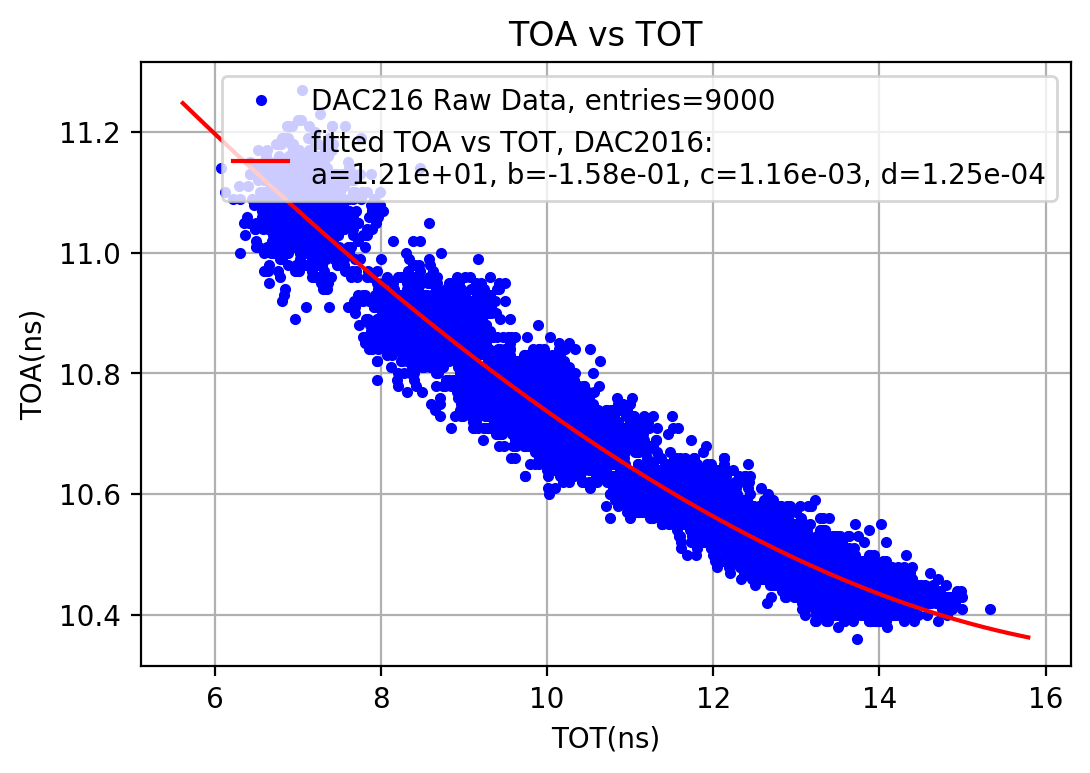

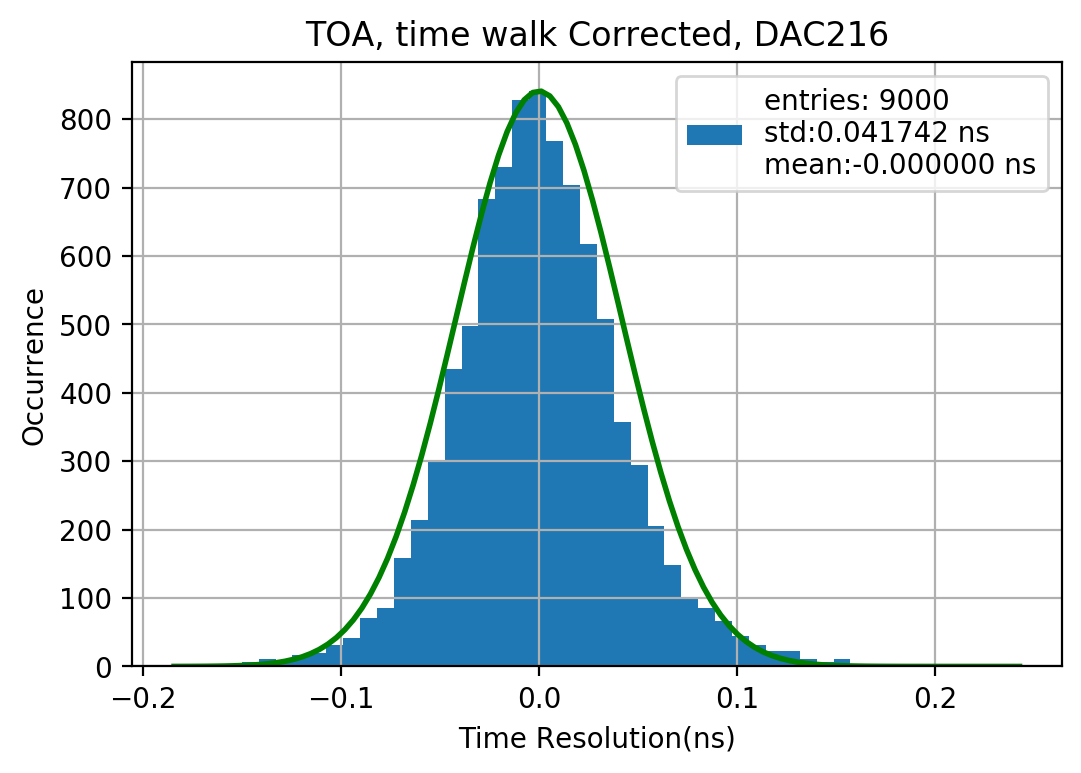

5.617500000000112
15.792500000000034


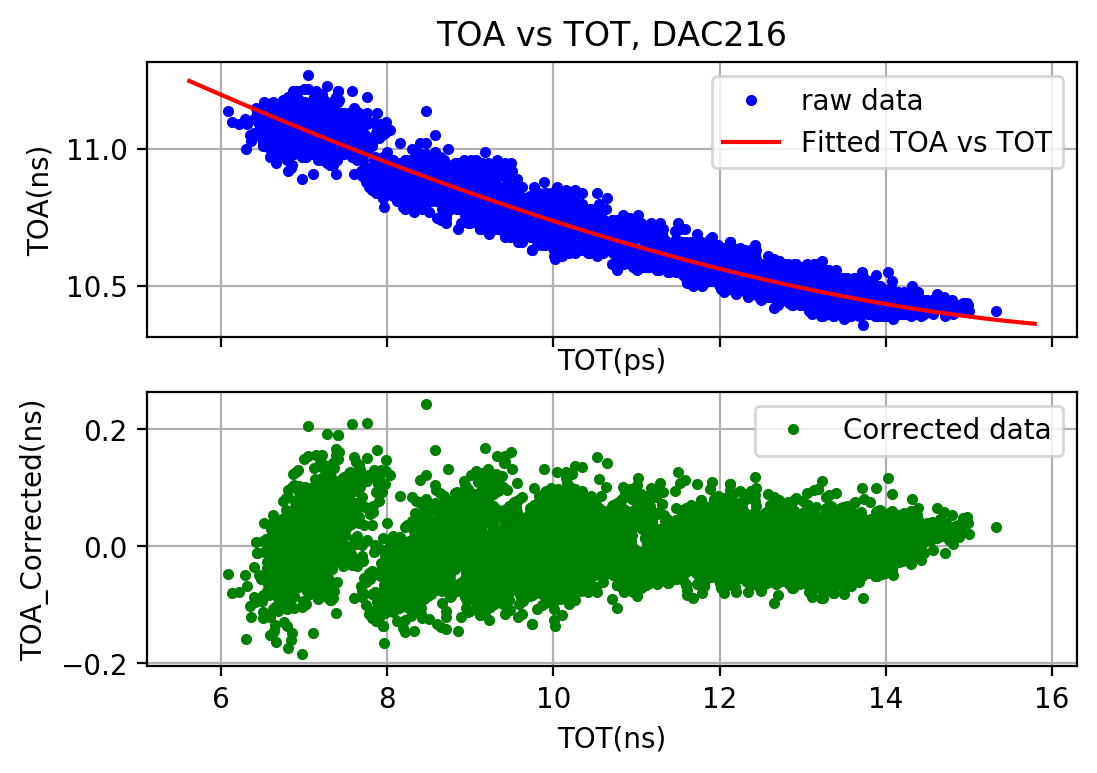

In [8]:
polynomial_4th = True
# polynomial_4th = False

# LindseyFit = True
LindseyFit = False
# SciFit = True       #scipy fitting with normal distribution
SciFit = False      #scipy unbiased standard deviation

############### Time Walk Calibration  DAC216 ##################

length_DAC216_le = len(t_discri_le_notrig_DAC216_list)
print('length of DAC216 list is', length_DAC216_le)

le_DAC216 = t_discri_le_notrig_DAC216_list[0] + t_discri_le_notrig_DAC216_list[1] + \
                t_discri_le_notrig_DAC216_list[2] + t_discri_le_notrig_DAC216_list[3] + \
                t_discri_le_notrig_DAC216_list[4] + t_discri_le_notrig_DAC216_list[5] + \
                t_discri_le_notrig_DAC216_list[6] + t_discri_le_notrig_DAC216_list[7] + \
                t_discri_le_notrig_DAC216_list[8]
te_DAC216 = t_discri_te_notrig_DAC216_list[0] + t_discri_te_notrig_DAC216_list[1] + \
                t_discri_te_notrig_DAC216_list[2] + t_discri_te_notrig_DAC216_list[3] + \
                t_discri_te_notrig_DAC216_list[4] + t_discri_te_notrig_DAC216_list[5] + \
                t_discri_te_notrig_DAC216_list[6] + t_discri_te_notrig_DAC216_list[7] + \
                t_discri_te_notrig_DAC216_list[8]

print(len(te_DAC216))

le_DAC216 = np.array(le_DAC216)
te_DAC216 = np.array(te_DAC216)

length_DAC216 = len(te_DAC216)

tot_DAC216 = te_DAC216 - le_DAC216

if polynomial_4th == True:
    popt_toa_DAC216, pcov_toa_DAC216 = curve_fit(etroc0_benchtest.func1, tot_DAC216, le_DAC216)
else:
    popt_toa_DAC216, pcov_toa_DAC216 = curve_fit(etroc0_benchtest.func0, tot_DAC216, le_DAC216)



fig1,ax1 = plt.subplots(dpi=200)
ax1.plot(tot_DAC216, le_DAC216, 'b.', label='DAC216 Raw Data, entries=%d'%(length_DAC216))

#print fit
xmin, xmax = plt.xlim()
xtot = np.linspace(xmin, xmax, 1000)
print(xmin)
print(xmax)
if polynomial_4th == True:
    ax1.plot(xtot, etroc0_benchtest.func1(xtot, *popt_toa_DAC216), 'r-', 
         label='fitted TOA vs TOT, DAC2016: \na=%5.2e, b=%5.2e, c=%5.2e, d=%5.2e' % tuple(popt_toa_DAC216))
else:
    ax1.plot(xtot, etroc0_benchtest.func0(xtot, *popt_toa_DAC216), 'r-', 
         label='fitted TOA vs TOT, DAC2016: \na=%5.2e, b=%5.2e' % tuple(popt_toa_DAC216))

ax1.set(xlabel='TOT(ns)', ylabel='TOA(ns)',
       title='TOA vs TOT')
# ax1.set_ylim(bottom=3000,top=7000)

ax1.grid()
ax1.legend()
plt.show()


#################################
#time walk correction and fit
#################################



# Generate data 
if polynomial_4th == True:
    toa_DAC216_fitted=etroc0_benchtest.func1(tot_DAC216, *popt_toa_DAC216)
else:
    toa_DAC216_fitted=etroc0_benchtest.func0(tot_DAC216, *popt_toa_DAC216)

toa_DAC216_corrected = le_DAC216 - toa_DAC216_fitted

if LindseyFit == True:
    etroc0_benchtest.plot_distribution_time_Lindsey(toa_DAC216_corrected, 'file_item', num_bins= 50, 
                                        range_default = None, xaxis = 'TOA corrected(ns)',ylable = 'Occurrence', 
                                         title = 'TOA, time walk Corrected, DAC216', pic = True, pdf = False)
else:
    if SciFit == True:
        etroc0_benchtest.plot_distribution_time(toa_DAC216_corrected, 'file_item', num_bins= 50, 
                                        range_default = None, xaxis = 'TOA corrected(ns)',ylable = 'Occurrence', 
                                         title = 'TOA, time walk Corrected, DAC216', pic = True, pdf = False)
    else:
        etroc0_benchtest.plot_distribution_time_nofit(toa_DAC216_corrected, 'file_item', num_bins= 50, 
                                        range_default = None, xaxis = 'TOA corrected(ns)',ylable = 'Occurrence', 
                                         title = 'TOA, time walk Corrected, DAC216', pic = True, pdf = False)


######################## plot demo #################################

#print orginal data
fig5,ax5 = plt.subplots(2,1,sharex=True,dpi=200)
ax5[0].plot(tot_DAC216, le_DAC216, 'b.', label='raw data')


#print fit
xmin, xmax = plt.xlim()
xtot = np.linspace(xmin, xmax, 1000)
print(xmin)
print(xmax)
if polynomial_4th == True:
    ax5[0].plot(xtot, etroc0_benchtest.func1(xtot, *popt_toa_DAC216), 'r-', label='Fitted TOA vs TOT')
else:
    ax5[0].plot(xtot, etroc0_benchtest.func0(xtot, *popt_toa_DAC216), 'r-', label='Fitted TOA vs TOT')



ax5[0].set(xlabel='TOT(ps)', ylabel='TOA(ns)',
       title='TOA vs TOT, DAC216')
ax5[0].grid()
ax5[0].legend()

ax5[1].plot(tot_DAC216, toa_DAC216_corrected,'g.', label='Corrected data')
ax5[1].set(xlabel='TOT(ns)', ylabel='TOA_Corrected(ns)')
# ax5[1].set_ylim(-500, 500)
# ax5[1].hist(toa_DAC216_corrected, orientation='horizontal', density = True)
ax5[1].grid()
ax5[1].legend()

plt.show()

length of DAC222 list is 10
9000
4.2880000000001015
13.792000000000074


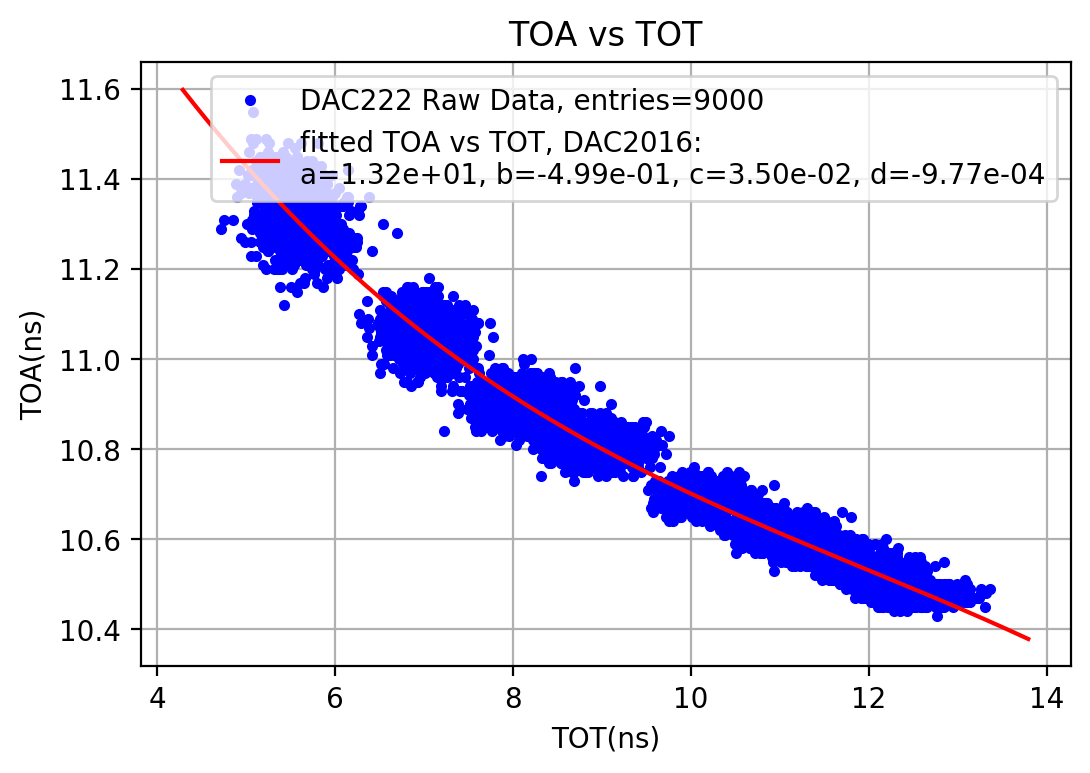

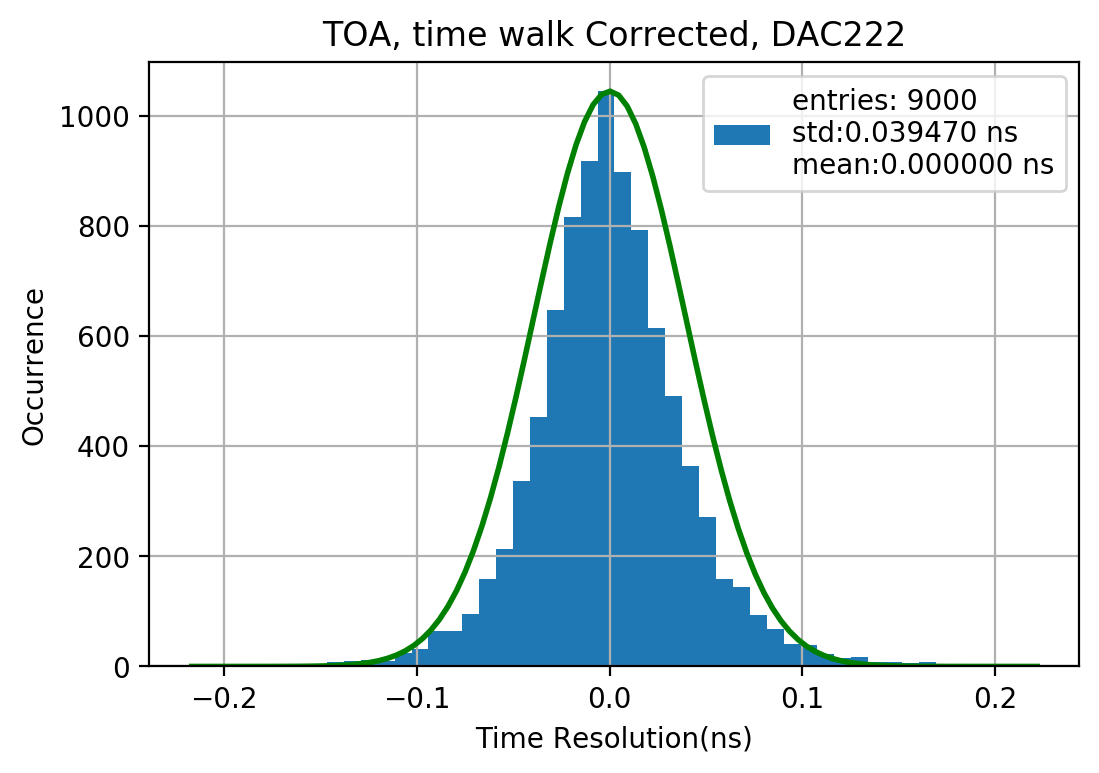

4.2880000000001015
13.792000000000074


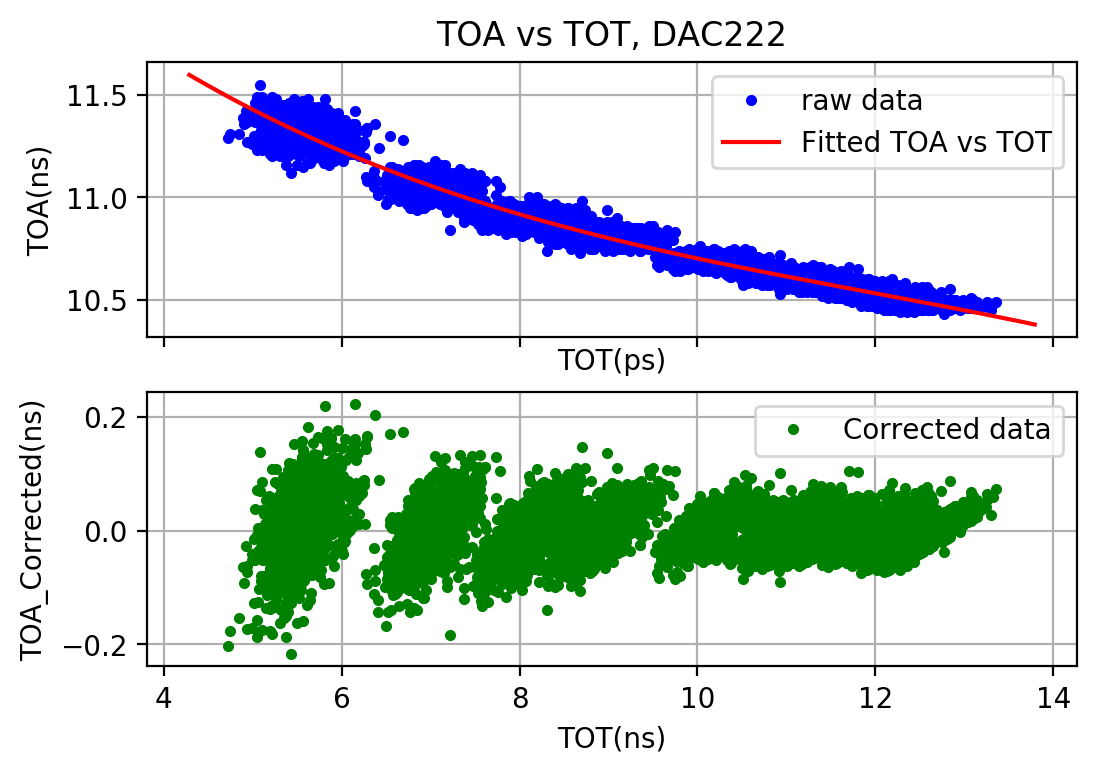

In [9]:
polynomial_4th = True
# polynomial_4th = False

# LindseyFit = True
LindseyFit = False
# SciFit = True       #scipy fitting with normal distribution
SciFit = False      #scipy unbiased standard deviation

############### Time Walk Calibration  DAC222 ##################

length_DAC222_le = len(t_discri_le_notrig_DAC222_list)
print('length of DAC222 list is', length_DAC222_le)

le_DAC222 = t_discri_le_notrig_DAC222_list[0] + t_discri_le_notrig_DAC222_list[1] + \
                t_discri_le_notrig_DAC222_list[2] + t_discri_le_notrig_DAC222_list[3] + \
                t_discri_le_notrig_DAC222_list[4] + t_discri_le_notrig_DAC222_list[5] + \
                t_discri_le_notrig_DAC222_list[6] + t_discri_le_notrig_DAC222_list[7] + \
                t_discri_le_notrig_DAC222_list[8]
te_DAC222 = t_discri_te_notrig_DAC222_list[0] + t_discri_te_notrig_DAC222_list[1] + \
                t_discri_te_notrig_DAC222_list[2] + t_discri_te_notrig_DAC222_list[3] + \
                t_discri_te_notrig_DAC222_list[4] + t_discri_te_notrig_DAC222_list[5] + \
                t_discri_te_notrig_DAC222_list[6] + t_discri_te_notrig_DAC222_list[7] + \
                t_discri_te_notrig_DAC222_list[8]

print(len(te_DAC222))

le_DAC222 = np.array(le_DAC222)
te_DAC222 = np.array(te_DAC222)

length_DAC222 = len(te_DAC222)

tot_DAC222 = te_DAC222 - le_DAC222

if polynomial_4th == True:
    popt_toa_DAC222, pcov_toa_DAC222 = curve_fit(etroc0_benchtest.func1, tot_DAC222, le_DAC222)
else:
    popt_toa_DAC222, pcov_toa_DAC222 = curve_fit(etroc0_benchtest.func0, tot_DAC222, le_DAC222)



fig1,ax1 = plt.subplots(dpi=200)
ax1.plot(tot_DAC222, le_DAC222, 'b.', label='DAC222 Raw Data, entries=%d'%(length_DAC222))

#print fit
xmin, xmax = plt.xlim()
xtot = np.linspace(xmin, xmax, 1000)
print(xmin)
print(xmax)
if polynomial_4th == True:
    ax1.plot(xtot, etroc0_benchtest.func1(xtot, *popt_toa_DAC222), 'r-', 
         label='fitted TOA vs TOT, DAC2016: \na=%5.2e, b=%5.2e, c=%5.2e, d=%5.2e' % tuple(popt_toa_DAC222))
else:
    ax1.plot(xtot, etroc0_benchtest.func0(xtot, *popt_toa_DAC222), 'r-', 
         label='fitted TOA vs TOT, DAC2016: \na=%5.2e, b=%5.2e' % tuple(popt_toa_DAC222))

ax1.set(xlabel='TOT(ns)', ylabel='TOA(ns)',
       title='TOA vs TOT')
# ax1.set_ylim(bottom=3000,top=7000)

ax1.grid()
ax1.legend()
plt.show()


#################################
#time walk correction and fit
#################################



# Generate data 
if polynomial_4th == True:
    toa_DAC222_fitted=etroc0_benchtest.func1(tot_DAC222, *popt_toa_DAC222)
else:
    toa_DAC222_fitted=etroc0_benchtest.func0(tot_DAC222, *popt_toa_DAC222)

toa_DAC222_corrected = le_DAC222 - toa_DAC222_fitted

if LindseyFit == True:
    etroc0_benchtest.plot_distribution_time_Lindsey(toa_DAC222_corrected, 'file_item', num_bins= 50, 
                                        range_default = None, xaxis = 'TOA corrected(ns)',ylable = 'Occurrence', 
                                         title = 'TOA, time walk Corrected, DAC222', pic = True, pdf = False)
else:
    if SciFit == True:
        etroc0_benchtest.plot_distribution_time(toa_DAC222_corrected, 'file_item', num_bins= 50, 
                                        range_default = None, xaxis = 'TOA corrected(ns)',ylable = 'Occurrence', 
                                         title = 'TOA, time walk Corrected, DAC222', pic = True, pdf = False)
    else:
        etroc0_benchtest.plot_distribution_time_nofit(toa_DAC222_corrected, 'file_item', num_bins= 50, 
                                        range_default = None, xaxis = 'TOA corrected(ns)',ylable = 'Occurrence', 
                                         title = 'TOA, time walk Corrected, DAC222', pic = True, pdf = False)


######################## plot demo #################################

#print orginal data
fig5,ax5 = plt.subplots(2,1,sharex=True,dpi=200)
ax5[0].plot(tot_DAC222, le_DAC222, 'b.', label='raw data')


#print fit
xmin, xmax = plt.xlim()
xtot = np.linspace(xmin, xmax, 1000)
print(xmin)
print(xmax)
if polynomial_4th == True:
    ax5[0].plot(xtot, etroc0_benchtest.func1(xtot, *popt_toa_DAC222), 'r-', label='Fitted TOA vs TOT')
else:
    ax5[0].plot(xtot, etroc0_benchtest.func0(xtot, *popt_toa_DAC222), 'r-', label='Fitted TOA vs TOT')



ax5[0].set(xlabel='TOT(ps)', ylabel='TOA(ns)',
       title='TOA vs TOT, DAC222')
ax5[0].grid()
ax5[0].legend()

ax5[1].plot(tot_DAC222, toa_DAC222_corrected,'g.', label='Corrected data')
ax5[1].set(xlabel='TOT(ns)', ylabel='TOA_Corrected(ns)')
# ax5[1].set_ylim(-500, 500)
# ax5[1].hist(toa_DAC222_corrected, orientation='horizontal', density = True)
ax5[1].grid()
ax5[1].legend()

plt.show()

length of DAC232 list is 9
8000
3.1755000000001057
11.194500000000108


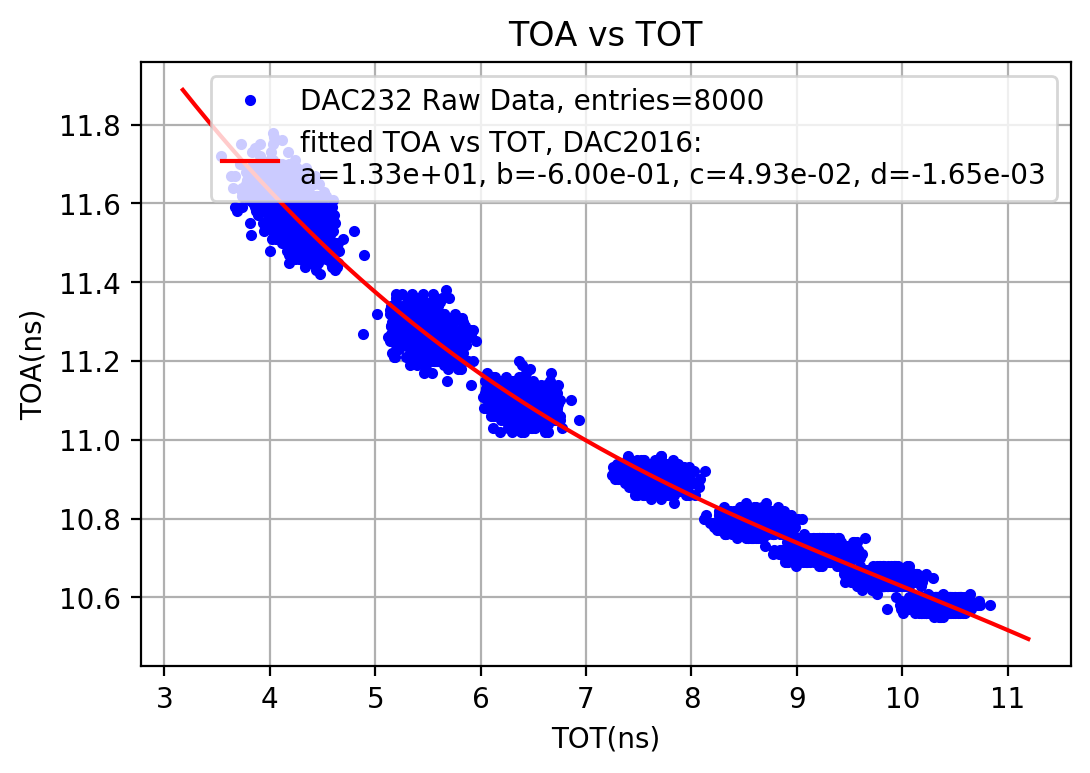

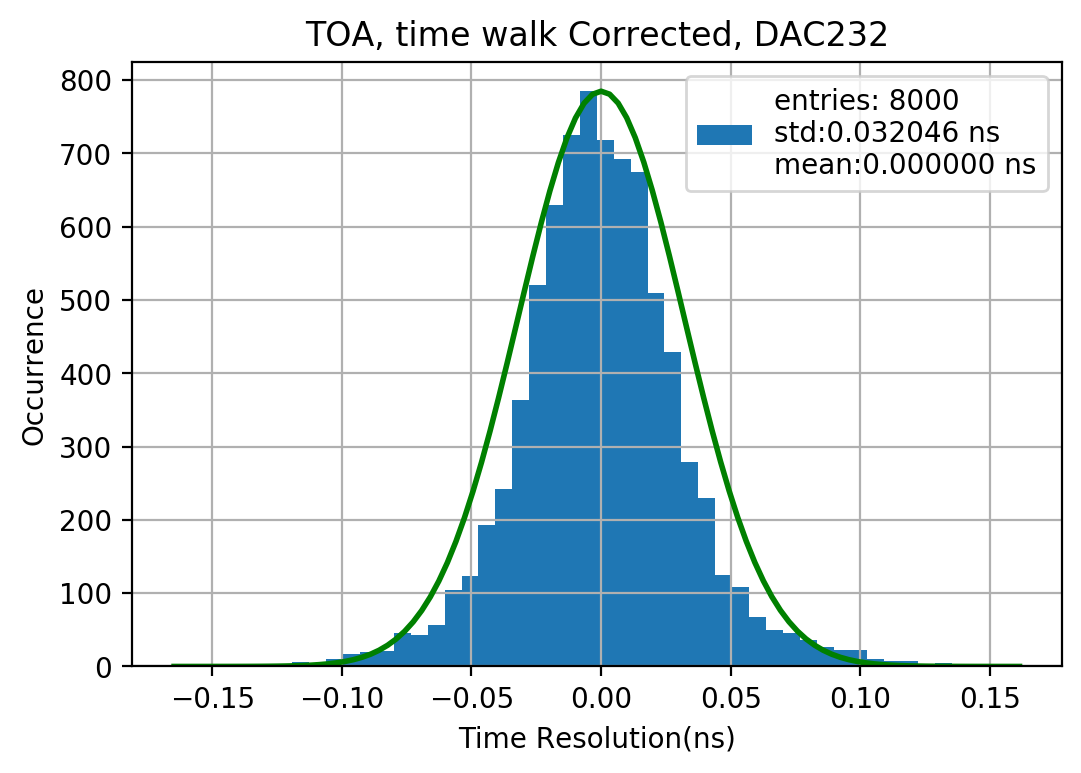

3.1755000000001057
11.194500000000108


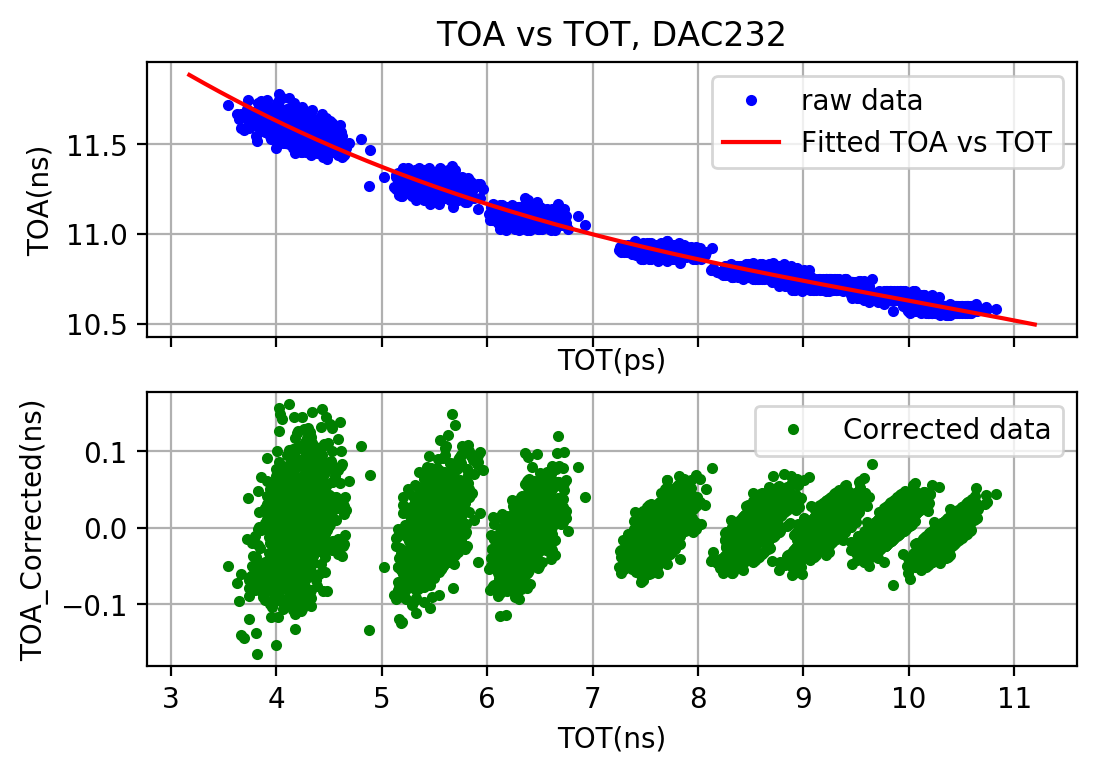

In [10]:
polynomial_4th = True
# polynomial_4th = False

# LindseyFit = True
LindseyFit = False
# SciFit = True       #scipy fitting with normal distribution
SciFit = False      #scipy unbiased standard deviation

############### Time Walk Calibration  DAC232 ##################

length_DAC232_le = len(t_discri_le_notrig_DAC232_list)
print('length of DAC232 list is', length_DAC232_le)

le_DAC232 = t_discri_le_notrig_DAC232_list[0] + t_discri_le_notrig_DAC232_list[1] + \
                t_discri_le_notrig_DAC232_list[2] + t_discri_le_notrig_DAC232_list[3] + \
                t_discri_le_notrig_DAC232_list[4] + t_discri_le_notrig_DAC232_list[5] + \
                t_discri_le_notrig_DAC232_list[6] + t_discri_le_notrig_DAC232_list[7]
te_DAC232 = t_discri_te_notrig_DAC232_list[0] + t_discri_te_notrig_DAC232_list[1] + \
                t_discri_te_notrig_DAC232_list[2] + t_discri_te_notrig_DAC232_list[3] + \
                t_discri_te_notrig_DAC232_list[4] + t_discri_te_notrig_DAC232_list[5] + \
                t_discri_te_notrig_DAC232_list[6] + t_discri_te_notrig_DAC232_list[7]

print(len(te_DAC232))

le_DAC232 = np.array(le_DAC232)
te_DAC232 = np.array(te_DAC232)

length_DAC232 = len(te_DAC232)

tot_DAC232 = te_DAC232 - le_DAC232

if polynomial_4th == True:
    popt_toa_DAC232, pcov_toa_DAC232 = curve_fit(etroc0_benchtest.func1, tot_DAC232, le_DAC232)
else:
    popt_toa_DAC232, pcov_toa_DAC232 = curve_fit(etroc0_benchtest.func0, tot_DAC232, le_DAC232)



fig1,ax1 = plt.subplots(dpi=200)
ax1.plot(tot_DAC232, le_DAC232, 'b.', label='DAC232 Raw Data, entries=%d'%(length_DAC232))

#print fit
xmin, xmax = plt.xlim()
xtot = np.linspace(xmin, xmax, 1000)
print(xmin)
print(xmax)
if polynomial_4th == True:
    ax1.plot(xtot, etroc0_benchtest.func1(xtot, *popt_toa_DAC232), 'r-', 
         label='fitted TOA vs TOT, DAC2016: \na=%5.2e, b=%5.2e, c=%5.2e, d=%5.2e' % tuple(popt_toa_DAC232))
else:
    ax1.plot(xtot, etroc0_benchtest.func0(xtot, *popt_toa_DAC232), 'r-', 
         label='fitted TOA vs TOT, DAC2016: \na=%5.2e, b=%5.2e' % tuple(popt_toa_DAC232))

ax1.set(xlabel='TOT(ns)', ylabel='TOA(ns)',
       title='TOA vs TOT')
# ax1.set_ylim(bottom=3000,top=7000)

ax1.grid()
ax1.legend()
plt.show()


#################################
#time walk correction and fit
#################################



# Generate data 
if polynomial_4th == True:
    toa_DAC232_fitted=etroc0_benchtest.func1(tot_DAC232, *popt_toa_DAC232)
else:
    toa_DAC232_fitted=etroc0_benchtest.func0(tot_DAC232, *popt_toa_DAC232)

toa_DAC232_corrected = le_DAC232 - toa_DAC232_fitted

if LindseyFit == True:
    etroc0_benchtest.plot_distribution_time_Lindsey(toa_DAC232_corrected, 'file_item', num_bins= 50, 
                                        range_default = None, xaxis = 'TOA corrected(ns)',ylable = 'Occurrence', 
                                         title = 'TOA, time walk Corrected, DAC232', pic = True, pdf = False)
else:
    if SciFit == True:
        etroc0_benchtest.plot_distribution_time(toa_DAC232_corrected, 'file_item', num_bins= 50, 
                                        range_default = None, xaxis = 'TOA corrected(ns)',ylable = 'Occurrence', 
                                         title = 'TOA, time walk Corrected, DAC232', pic = True, pdf = False)
    else:
        etroc0_benchtest.plot_distribution_time_nofit(toa_DAC232_corrected, 'file_item', num_bins= 50, 
                                        range_default = None, xaxis = 'TOA corrected(ns)',ylable = 'Occurrence', 
                                         title = 'TOA, time walk Corrected, DAC232', pic = True, pdf = False)


######################## plot demo #################################

#print orginal data
fig5,ax5 = plt.subplots(2,1,sharex=True,dpi=200)
ax5[0].plot(tot_DAC232, le_DAC232, 'b.', label='raw data')


#print fit
xmin, xmax = plt.xlim()
xtot = np.linspace(xmin, xmax, 1000)
print(xmin)
print(xmax)
if polynomial_4th == True:
    ax5[0].plot(xtot, etroc0_benchtest.func1(xtot, *popt_toa_DAC232), 'r-', label='Fitted TOA vs TOT')
else:
    ax5[0].plot(xtot, etroc0_benchtest.func0(xtot, *popt_toa_DAC232), 'r-', label='Fitted TOA vs TOT')



ax5[0].set(xlabel='TOT(ps)', ylabel='TOA(ns)',
       title='TOA vs TOT, DAC232')
ax5[0].grid()
ax5[0].legend()

ax5[1].plot(tot_DAC232, toa_DAC232_corrected,'g.', label='Corrected data')
ax5[1].set(xlabel='TOT(ns)', ylabel='TOA_Corrected(ns)')
# ax5[1].set_ylim(-500, 500)
# ax5[1].hist(toa_DAC232_corrected, orientation='horizontal', density = True)
ax5[1].grid()
ax5[1].legend()

plt.show()